In [1]:
import pylab
import numpy as np
np.seterr(all='raise')
np.random.seed(13)
import scipy as sp
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('text', usetex=True)
%matplotlib inline
from tqdm import tqdm

from sklearn import datasets

In [2]:
def calc_error(res,e,names=[]):
    tmp_i = np.zeros(len(res.x))
    etol = e * max(1, abs(res.fun))
    for i in range(len(res.x)):
        tmp_i[i] = 1.0
        hess_inv_i = res.hess_inv(tmp_i)[i]
        uncertainty_i = np.sqrt(etol * hess_inv_i)
        tmp_i[i] = 0.0
        if len(names) > 0:
            print('{0} = {1:12.4e} ± {2:.1e}'.format(names[i], res.x[i], uncertainty_i))
        else:
            print('x^{0} = {1:12.4e} ± {2:.1e}'.format(i, res.x[i], uncertainty_i))

# Revisar bases de datos conocidas
[SciKit Learn](https://scikit-learn.org/stable/datasets/index.html)
<!-- X,Y = datasets.load_boston(return_X_y=True) -->

In [3]:
datasets.load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
A = pd.DataFrame(datasets.load_boston().data, columns=datasets.load_boston().feature_names)
b = pd.DataFrame(datasets.load_boston().target, columns=["MEDV"])

In [5]:
A

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


$$X = x_1+x_2+x_3+\dots$$
Mi intención,
$$CRIM\times x_1+ZN\times x_2+INDUS\times x_3+\dots = b$$

In [6]:
Anumpy = np.matrix(A.to_numpy(dtype=np.float64))
bnumpy = np.matrix(b.to_numpy(dtype=np.float64))

In [8]:
Anumpy.shape

(506, 13)

In [9]:
# %%timeit
X_opt = np.linalg.inv(Anumpy.T*Anumpy)*Anumpy.T*bnumpy

In [10]:
print(X_opt.T)

[[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
  -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
   1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
  -4.16304471e-01]]


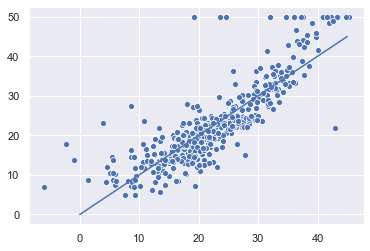

In [11]:
sns.scatterplot(np.array(Anumpy*X_opt).flatten(),np.array(bnumpy).flatten())
plt.plot([0,45],[0,45])

In [12]:
predicciones = np.array(Anumpy*X_opt).flatten()

In [13]:
observaciones = np.array(bnumpy).flatten()
bbarrita = observaciones.mean()

In [14]:
r2 = (np.linalg.norm(predicciones - bbarrita)**2)/(np.linalg.norm(observaciones - bbarrita)**2)

In [15]:
r2

0.7469933756731204

In [16]:
m,n = Anumpy.shape
m

506

In [19]:
Atilde = (Anumpy - Anumpy.mean(axis=0))/Anumpy.std(axis=0)

In [21]:
Atilde.mean(axis=0)

matrix([[-8.78743718e-17, -6.34319123e-16, -2.68291099e-15,
          4.70199198e-16,  2.49032240e-15, -1.14523016e-14,
         -1.40785495e-15,  9.21090169e-16,  5.44140929e-16,
         -8.86861950e-16, -9.20563581e-15,  8.16310129e-15,
         -3.37016317e-16]])

In [22]:
Atilde.std(axis=0)

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
Stilde = (Atilde.T*Atilde)/m
Stilde

matrix([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
         -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
          0.28994558, -0.38506394,  0.45562148],
        [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
          0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
         -0.39167855,  0.17552032, -0.41299457],
        [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145,
         -0.39167585,  0.64477851, -0.70802699,  0.59512927,  0.72076018,
          0.38324756, -0.35697654,  0.60379972],
        [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281,
          0.09125123,  0.08651777, -0.09917578, -0.00736824, -0.03558652,
         -0.12151517,  0.04878848, -0.0539293 ],
        [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ,
         -0.30218819,  0.7314701 , -0.76923011,  0.61144056,  0.6680232 ,
          0.18893268, -0.38005064,  0.59087892],
        [-0.219

In [35]:
ev,eig = np.linalg.eig(Stilde)
idx = ev.argsort()[::-1]
ev

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

In [59]:
num_evs = 2
print(ev[idx[:num_evs]])
T = eig[:,idx[:num_evs]]

[6.12684883 1.43327512]


In [60]:
Abar = Anumpy*T

In [61]:
Abar

matrix([[-38.89018107, -32.93532391],
        [-33.02343232, -54.79866941],
        [-26.53873512, -48.76840918],
        ...,
        [-49.08729488, -52.32240905],
        [-49.49001494, -50.78673003],
        [-46.64886906, -48.71888423]])

In [62]:
# %%timeit
Y_opt = np.linalg.inv(Abar.T*Abar)*Abar.T*bnumpy

In [63]:
print(Y_opt.T)

[[-0.20436228 -0.35905956]]


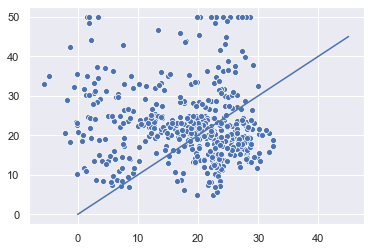

In [64]:
sns.scatterplot(np.array(Abar*Y_opt).flatten(),np.array(bnumpy).flatten())
plt.plot([0,45],[0,45])

In [65]:
predicciones = np.array(Abar*Y_opt).flatten()

In [66]:
observaciones = np.array(bnumpy).flatten()
bbarrita = observaciones.mean()

In [67]:
r2 = (np.linalg.norm(predicciones - bbarrita)**2)/(np.linalg.norm(observaciones - bbarrita)**2)

In [68]:
r2

0.9971504234790737

# Usando librerias interesantes: Sklearn
* [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): $\tilde{x}_j=(x_j-\mu_j)/\sigma_j$
* [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): Lo hace todo por nosotros!